In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.2
    Uninstalling scipy-1.3.2:
      Successfully uninstalled scipy-1.3.2


In [11]:
!ls drive/'My Drive'/256_ObjectCategories	

001.ak47		 087.goldfish	      173.rifle
002.american-flag	 088.golf-ball	      174.rotary-phone
003.backpack		 089.goose	      175.roulette-wheel
004.baseball-bat	 090.gorilla	      176.saddle
005.baseball-glove	 091.grand-piano-101  177.saturn
006.basketball-hoop	 092.grapes	      178.school-bus
007.bat			 093.grasshopper      179.scorpion-101
008.bathtub		 094.guitar-pick      180.screwdriver
009.bear		 095.hamburger	      181.segway
010.beer-mug		 096.hammock	      182.self-propelled-lawn-mower
011.billiards		 097.harmonica	      183.sextant
012.binoculars		 098.harp	      184.sheet-music
013.birdbath		 099.harpsichord      185.skateboard
014.blimp		 100.hawksbill-101    186.skunk
015.bonsai-101		 101.head-phones      187.skyscraper
016.boom-box		 102.helicopter-101   188.smokestack
017.bowling-ball	 103.hibiscus	      189.snail
018.bowling-pin		 104.homer-simpson    190.snake
019.boxing-glove	 105.horse	      191.sneaker
020.brain-101		 106.horseshoe-crab   192.snowmobile
021.bread

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
# K.set_image_dim_ordering('th')

import os
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow as tf



Using TensorFlow backend.


In [5]:
def imread(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img
    
#cwd = os.getcwd()
path = "drive/My Drive/256_ObjectCategories"
valid_exts = [".jpg", ".gif", ".png", ".peg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = sorted(os.listdir(path))
ncategories = len(categories)
imgs = []
labels = []
# LOAD ALL IMAGES 
for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = scipy.misc.imresize(imread(fullpath), [128,128, 3])
            img = img.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            imgs.append(img) # NORMALIZE IMAGE 
            label_curr = i
            labels.append(label_curr)
        #iter = (iter+1)%10;
print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)) )
print (ncategories)

seed = 7
np.random.seed(seed)
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.7)
X_train = np.stack(X_train, axis=0)
y_train = np.stack(y_train, axis=0)
X_test = np.stack(X_test, axis=0)
y_test = np.stack(y_test, axis=0)
print ("Num train_imgs: %d" % (len(X_train)))
print ("Num test_imgs: %d" % (len(X_test)))
# # one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes= y_test.shape[1]

print(y_test.shape)
print(X_train[1,1,1,:])
print(y_train[1])
# normalize inputs from 0-255 to 0.0-1.0
print(X_train.shape)
print(X_test.shape)
# X_train = X_train.transpose(0, 3, 1, 2)
# X_test = X_test.transpose(0, 3, 1, 2)
# print(X_train.shape)
# print(X_test.shape)



[257] CATEGORIES ARE IN 
 drive/My Drive/256_ObjectCategories


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Num imgs: 506
Num labels: 506
257
Num train_imgs: 151
Num test_imgs: 355
(355, 257)
[-3.6800003 12.220001  -5.9400024]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(151, 128, 128, 3)
(355, 128, 128, 3)


In [6]:
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
# Create the model
model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile mode
epochs = 300
lrate = 0.0001
decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = SGD(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

np.random.seed(seed)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0        

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 151 samples, validate on 355 samples
Epoch 1/300





151/151 [==============================] - 24s 156ms/step - loss: 5.6312 - acc: 0.0000e+00 - val_loss: 5.6025 - val_acc: 0.0000e+00
Epoch 2/300
151/151 [==============================] - 3s 21ms/step - loss: 5.6235 - acc: 0.0000e+00 - val_loss: 5.5874 - val_acc: 0.0000e+00
Epoch 3/300
151/151 [==============================] - 3s 21ms/step - loss: 5.6051 - acc: 0.0000e+00 - val_loss: 5.5732 - val_acc: 0.0000e+00
Epoch 4/300
151/151 [==============================] - 3s 21ms/step - loss: 5.5818 - acc: 0.0000e+00 - val_loss: 5.5591 - val_acc: 0.0000e+00
Epoch 5/300
151/151 [==============================] - 3s 21ms/step - loss: 5.5701 - acc: 0.0000e+00 - val_loss: 5.5454 - val_acc: 0.0000e+00
Epoch 6/300
151/151 [==============================] - 3s 21ms/step - loss: 5.5574 - acc: 0.0000e+00 - val_loss: 5.5320 - val_acc: 0.0000e+0

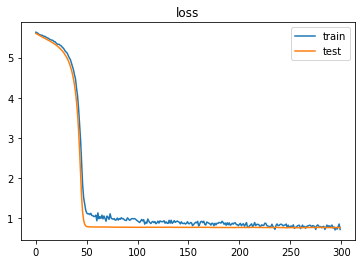

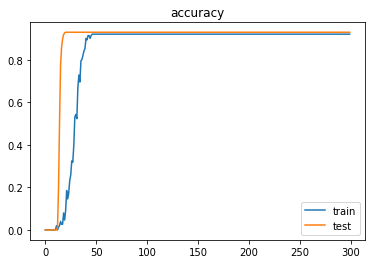

In [7]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=epochs, batch_size=56, shuffle=True)
#hist = model.load_weights('./64.15/model.h5');
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.savefig("accuracy7.png",dpi=300,format="png")
model_json = model.to_json()
with open("model7.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model7.h5")
print("Saved model to disk")
